In [427]:
import pandas as pd
import numpy as np
from pandas import read_csv



import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.tree import export_graphviz


# 모델튜닝


from scipy import stats
from random import random
from random import uniform
import math
import os
import missingno as msno
import graphviz  # 나무구조 시각화
import matplotlib.font_manager as fm
import warnings
from sklearn.tree import export_graphviz

warnings.filterwarnings('ignore')


path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()
matplotlib.rc('font', family=fontprop)
matplotlib.rc('axes', unicode_minus=False)


my_palette = ['#'+hex for hex in "9b5de5 f15bb5 fee440 00bbf9 00f5d4".split(' ')]
my_palette = sns.set_palette(my_palette)
sns.color_palette()

[(0.6078431372549019, 0.36470588235294116, 0.8980392156862745),
 (0.9450980392156862, 0.3568627450980392, 0.7098039215686275),
 (0.996078431372549, 0.8941176470588236, 0.25098039215686274),
 (0.0, 0.7333333333333333, 0.9764705882352941),
 (0.0, 0.9607843137254902, 0.8313725490196079)]

In [428]:
sales_raw = read_csv('01_sales_data2.csv')

In [429]:
customer_raw = read_csv('02_customer_data.csv')

In [430]:
stock_raw = read_csv('03_stock_data.csv')

In [431]:
sales_customer = pd.merge(sales_raw, customer_raw, on = 'customer_id')

In [432]:
sales_customer_stock = pd.merge(sales_customer, stock_raw, on='product_name')

In [433]:
sales_customer_stock =read_csv('css.csv')

In [434]:
sales_customer_stock

,Unnamed: 0.1,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,...,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,real_quantity,real_sales,margin
0,0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,...,339,156,small,sightseeing,other,consignment,0,10,19.50,1.950
1,1,1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,20.80,...,339,156,small,sightseeing,other,consignment,0,10,20.80,2.080
2,2,2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,1.95,...,8177,778,big,metro,east,consignment,0,1,1.95,0.195
3,3,3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,1.95,...,8177,778,big,metro,east,consignment,0,1,1.95,0.195
4,4,4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,4.16,...,8177,778,big,metro,east,consignment,0,2,4.16,0.416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276782,276782,282637,580865,90083,CRYSTAL CZECH CROSS PHONE CHARM,12,2021-12-06,0.19,E17914,2.28,...,8177,778,big,metro,east,consignment,0,12,2.28,0.228
276783,276783,282638,580893,79157B,UBO-LIGHT TRIOBASE BLUE,1,2021-12-06,0.85,E17290,0.85,...,3985,1216,middle,metro,west,buying,0,1,0.85,0.255
276784,276784,282639,581134,23442,12 HANGING EGGS HAND PAINTED,1,2021-12-07,2.08,E16368,2.08,...,1585,348,middle,other,east,consignment,0,1,2.08,0.208
276785,276785,282640,581134,23442,12 HANGING EGGS HAND PAINTED,8,2021-12-07,2.08,E16368,16.64,...,1585,348,middle,other,east,consignment,0,8,16.64,1.664


In [435]:
css

,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,month,weekday
0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,Honolulu,HI,339,156,small,sightseeing,other,consignment,0,1,0
1,1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,20.80,Honolulu,HI,339,156,small,sightseeing,other,consignment,0,7,2
2,2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,1.95,New York,NY,8177,778,big,metro,east,consignment,0,3,3
3,3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,1.95,New York,NY,8177,778,big,metro,east,consignment,0,3,0
4,4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,4.16,New York,NY,8177,778,big,metro,east,consignment,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276819,282637,580865,90083,CRYSTAL CZECH CROSS PHONE CHARM,12,2021-12-06,0.19,E17914,2.28,New York,NY,8177,778,big,metro,east,consignment,0,12,0
276820,282638,580893,79157B,UBO-LIGHT TRIOBASE BLUE,1,2021-12-06,0.85,E17290,0.85,Los Angeles,CA,3985,1216,middle,metro,west,buying,0,12,0
276821,282639,581134,23442,12 HANGING EGGS HAND PAINTED,1,2021-12-07,2.08,E16368,2.08,Philadelphia,PA,1585,348,middle,other,east,consignment,0,12,1
276822,282640,581134,23442,12 HANGING EGGS HAND PAINTED,8,2021-12-07,2.08,E16368,16.64,Philadelphia,PA,1585,348,middle,other,east,consignment,0,12,1


In [436]:
consignment = css[css['stock_type'] == 'consignment']

In [437]:
buying = css[css['stock_type'] == 'buying']

In [438]:
buying

,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,month,weekday
4023,4092,539993,22898,CHILDRENS APRON APPLES DESIGN,8,2021-01-04,1.95,E13313,15.60,Honolulu,HI,339,156,small,sightseeing,other,buying,0,1,0
4024,4093,552288,22898,CHILDRENS APRON APPLES DESIGN,8,2021-05-08,1.95,E13313,15.60,Honolulu,HI,339,156,small,sightseeing,other,buying,0,5,5
4025,4094,547962,22898,CHILDRENS APRON APPLES DESIGN,8,2021-03-28,1.95,E12957,15.60,Honolulu,HI,339,156,small,sightseeing,other,buying,0,3,6
4026,4095,540094,22898,CHILDRENS APRON APPLES DESIGN,8,2021-01-04,1.95,E14221,15.60,Houston,TX,2325,1658,middle,other,south,buying,0,1,0
4027,4096,544651,22898,CHILDRENS APRON APPLES DESIGN,50,2021-02-22,1.65,E13694,82.50,Houston,TX,2325,1658,middle,other,south,buying,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276796,282614,569673,21349,IVY HEART WREATH,2,2021-10-05,6.75,E17222,13.50,New York,NY,8177,778,big,metro,east,buying,0,10,1
276797,282615,570242,21349,IVY HEART WREATH,1,2021-10-09,6.75,E16380,6.75,Los Angeles,CA,3985,1216,middle,metro,west,buying,0,10,5
276812,282630,580399,22416,SET OF 36 SPACEBOY PAPER DOILIES,6,2021-12-04,1.45,E13471,8.70,Los Angeles,CA,3985,1216,middle,metro,west,buying,0,12,5
276817,282635,580691,90214W,"LETTER ""W"" BLING KEY RING",12,2021-12-05,0.29,E13790,3.48,New York,NY,8177,778,big,metro,east,buying,0,12,6


In [439]:
def to_dt(df, col):
    df[col] = pd.to_datetime(df[col])
    df['month'] = df[col].apply(lambda x : x.month)
    df['weekday'] = df[col].apply(lambda x : x.weekday())
    
    return df

트렌드차트 , ANOVA  검정 각 방식의 시간에 따른 매출액 변동을 확인
->그룹의 분산이 동일한지 검정


평균검정 각 방식의 판매 당 매출액의 평균을 검정->
각 판매 방식의 매출 기여도 확인


비율검정 각 방식별로 구매취소가 발생하는 비율의 
동일성을 검정 ->  판매방식에 따라 품질이 
동일한지를 파악


막대그래프,  비율검정 가격이 비싼 순으로 1 사분위 이상, 3
사분위 이하에 있는 제품들의 매출이 전체 
매출에 얼마 만큼의 기여를 하는지 파악

In [440]:
css = to_dt(css, 'date')
consignment = to_dt(consignment, 'date')
buying = to_dt(buying, 'date')

<AxesSubplot: xlabel='month'>

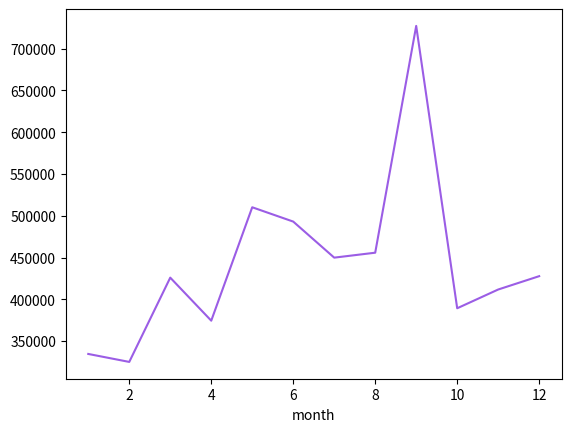

In [441]:
consignment.groupby('month')['sales'].sum().plot()

In [442]:
np.var(buying.groupby('month')['sales'].sum())

93605011.3552076

In [443]:
np.var(consignment.groupby('month')['sales'].sum())

10231370634.330606

In [444]:
stats.shapiro(buying.groupby('month')['sales'].sum())

ShapiroResult(statistic=0.7314126491546631, pvalue=0.0017210467485710979)

In [445]:
stats.shapiro(consignment.groupby('month')['sales'].sum())

ShapiroResult(statistic=0.8368450403213501, pvalue=0.02535233646631241)

In [446]:
stats.levene(consignment.groupby('month')['sales'].sum(), buying.groupby('month')['sales'].sum())

LeveneResult(statistic=6.658150351137222, pvalue=0.017072132175159238)

각 방식의 판매당 매출액의 평균 검정 -> 각 판매 방식의 매출 기여도 확인

In [447]:
sales_raw

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.50
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.50
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.50
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.50
...,...,...,...,...,...,...,...,...
282637,681452,21181,PLEASE ONE PERSON METAL SIGN,36,2021-12-23,2.10,E17675,75.60
282638,681452,22075,6 RIBBONS ELEGANT CHRISTMAS,24,2021-12-29,0.39,E17675,9.36
282639,681452,22086,PAPER CHAIN KIT 50'S CHRISTMAS,40,2021-12-25,2.55,E17675,102.00
282640,681452,22191,IVORY DINER WALL CLOCK,2,2021-12-21,8.50,E17675,17.00


In [448]:
sales_customer_stock = read_csv('customer_stock_sales.csv')

In [449]:
sales_customer_stock['margin'] = np.NaN

In [450]:
sales_customer_stock.loc[sales_customer_stock['stock_type'] == 'consignment','margin'] = sales_customer_stock.loc[sales_customer_stock['stock_type'] == 'consignment','real_sales'] * 0.1

In [451]:
sales_customer_stock.loc[sales_customer_stock['stock_type'] == 'buying','margin'] = sales_customer_stock.loc[sales_customer_stock['stock_type'] == 'buying','real_sales'] * 0.3

In [452]:
sales_customer_stock.to_csv('cus_sale_stk.csv')

In [453]:
total_margin = sales_customer_stock['margin'].sum()

In [454]:
total_margin

651980.3784

In [455]:
consignment_margin = sales_customer_stock.loc[sales_customer_stock['stock_type'] == 'consignment','margin'].sum()
buying_margin = sales_customer_stock.loc[sales_customer_stock['stock_type'] == 'buying','margin'].sum()

In [456]:
consignment_margin

516313.5984000001

In [457]:
buying_margin

135666.78

Text(0.5, 1.0, '위탁, 직매입 판매의 매출액 비중')

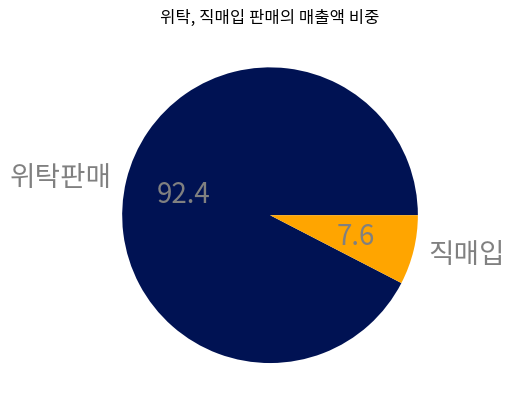

In [458]:
plt.pie([sales_customer_stock.loc[sales_customer_stock['stock_type'] == 'consignment', 'sales'].sum(),sales_customer_stock.loc[sales_customer_stock['stock_type'] == 'buying', 'sales'].sum()], colors=['#001253','orange'],autopct='%.1f', labels = ['위탁판매', '직매입'],textprops={'color' : 'grey', 'size' : '20'})
plt.title('위탁, 직매입 판매의 매출액 비중')

Text(0.5, 1.0, '위탁, 직매입 판매의 이익 비중')

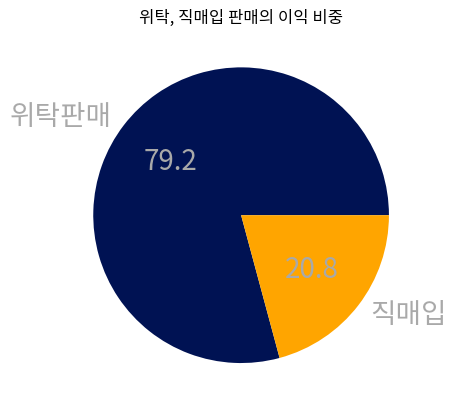

In [459]:
plt.pie([consignment_margin,buying_margin],colors=['#001253','orange'],autopct='%.1f', labels = ['위탁판매', '직매입'],textprops={'color' : 'darkgrey', 'size' : '20'})
plt.title('위탁, 직매입 판매의 이익 비중')

In [460]:
sales_customer_stock.to_csv('css.csv')

In [461]:
total_sales = sales_customer_stock['sales'].sum()

In [462]:
cons_ratio = sales_customer_stock.loc[sales_customer_stock['stock_type'] == 'consignment', 'sales'].sum() / total_sales
buy_ratio = sales_customer_stock.loc[sales_customer_stock['stock_type'] == 'buying', 'sales'].sum() / total_sales

In [463]:
cons_ratio
buy_ratio

0.07588630695541693

In [464]:
from statsmodels.stats.proportion import proportions_ztest

In [465]:
count = [sales_customer_stock.loc[sales_customer_stock['stock_type'] == 'consignment', 'sales'].sum(),sales_customer_stock.loc[sales_customer_stock['stock_type'] == 'consignment', 'margin'].sum()]
nobs = [sales_customer_stock['sales'].sum(),sales_customer_stock['margin'].sum()]

In [466]:
stat,pval = proportions_ztest(count,nobs)

In [467]:
print('%f'%pval)

0.000000


In [505]:
under25 = sales_customer_stock[sales_raw['unit_price'] <= sales_customer_stock['unit_price'].mean()]
over75 = sales_customer_stock[sales_raw['unit_price'] >= sales_customer_stock['unit_price'].mean()]
print(under25['quantity'].sum(),under25['sales'].sum())
print(over75['quantity'].sum(),over75['sales'].sum())

2452674 4144568.042999999
1079176 1884797.3110000002


Text(0.5, 1.0, '가격대에 따른 품목수')

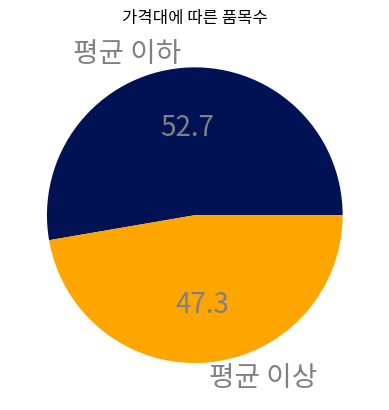

In [514]:
plt.pie([len(under25['product_name'].unique()), len(over75['product_name'].unique())],colors=['#001253','orange'],autopct='%.1f', labels = ['평균 이하', '평균 이상'],textprops={'color' : 'grey', 'size' : '20'})
plt.title('가격대에 따른 품목수')

Text(0.5, 1.0, '평균 가격 기준 이익 기여도 ')

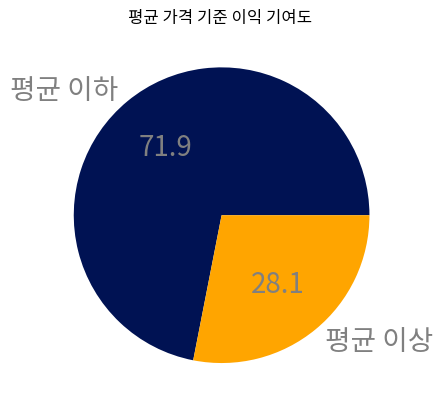

In [515]:
plt.pie([under25['margin'].sum(),over75['margin'].sum()],colors=['#001253','orange'],autopct='%.1f', labels = ['평균 이하', '평균 이상'],textprops={'color' : 'grey', 'size' : '20'})
plt.title('평균 가격 기준 이익 기여도 ')

In [508]:
proportions_ztest([len(under25['product_name'].unique()),over75['sales'].sum()], [len(under25['product_name'].unique()),sales['sales'].sum() ])

(83.32148805857602, 0.0)

In [472]:
sales_customer_stock.groupby(['state','city', 'stock_type',], as_index=False)['invoice'].count()

,state,city,stock_type,invoice
0,AZ,Phoenix,buying,1536
1,AZ,Phoenix,consignment,16500
2,CA,Los Angeles,buying,3512
3,CA,Los Angeles,consignment,36754
4,CA,San Diego,buying,1270
5,CA,San Diego,consignment,14262
6,CA,San Jose,buying,898
7,CA,San Jose,consignment,9647
8,FL,Miami,buying,581
9,FL,Miami,consignment,5669


In [473]:
sales_customer_stock.head(2)

,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,...,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,real_quantity,real_sales,margin
0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,...,339,156,small,sightseeing,other,consignment,0,10,19.5,1.95
1,1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,20.8,Honolulu,...,339,156,small,sightseeing,other,consignment,0,10,20.8,2.08


In [474]:
sales_customer_stock.groupby(['stock_type','QuantityCanceled'])['invoice'].count()

stock_type   QuantityCanceled
buying       0                   23667
             1                     156
             2                      43
             3                      18
             4                      21
                                 ...  
consignment  1930                    1
             2000                    1
             3114                    1
             74215                   1
             80995                   1
Name: invoice, Length: 138, dtype: int64

In [475]:
stock_raw

,product_name,stock_type
0,JUMBO BAG PINK POLKADOT,consignment
1,BLUE POLKADOT WRAP,consignment
2,RED RETROSPOT WRAP,consignment
3,RECYCLING BAG RETROSPOT,consignment
4,RED RETROSPOT SHOPPER BAG,consignment
...,...,...
3710,HAND PAINTED HANGING EASTER EGG,consignment
3711,CREAM HANGING HEART T-LIGHT HOLDER,consignment
3712,BLACK SIL'T SQU CANDLE PLATE,consignment
3713,VINTAGE ZINC WATERING CAN SMALL,consignment


In [476]:
sales_raw.groupby('product_name',as_index=False)['unit_price'].mean()

,product_name,unit_price
0,10 COLOUR SPACEBOY PEN,0.870203
1,12 COLOURED PARTY BALLOONS,0.655405
2,12 DAISY PEGS IN WOOD BOX,1.650000
3,12 EGG HOUSE PAINTED WOOD,12.750000
4,12 HANGING EGGS HAND PAINTED,2.080000
...,...,...
3710,ZINC T-LIGHT HOLDER STARS SMALL,0.828507
3711,ZINC TOP 2 DOOR WOODEN SHELF,16.950000
3712,ZINC WILLIE WINKIE CANDLE STICK,0.860986
3713,ZINC WIRE KITCHEN ORGANISER,6.530000


In [477]:
stock_raw = pd.merge(stock_raw,sales_raw.groupby('product_name',as_index=False)['invoice'].count(), on='product_name')

In [478]:
stock_raw = pd.merge(stock_raw,sales_raw.groupby('product_name',as_index=False)['unit_price'].mean(), on='product_name')

In [479]:
stock_raw = stock_raw.sort_values(by = 'invoice',ascending=False).reset_index(drop = True)

In [480]:
sales_raw[sales_raw['product_name']=='REGENCY CAKESTAND 3 TIER']

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
70,C540006,22423,REGENCY CAKESTAND 3 TIER,-1,2021-01-04,12.75,E14606,-12.75
156,540014,22423,REGENCY CAKESTAND 3 TIER,1,2021-01-04,12.75,E14606,12.75
320,540022,22423,REGENCY CAKESTAND 3 TIER,16,2021-01-04,10.95,E17188,175.20
364,540023,22423,REGENCY CAKESTAND 3 TIER,3,2021-01-04,12.75,E15039,38.25
613,540095,22423,REGENCY CAKESTAND 3 TIER,2,2021-01-04,12.75,E14553,25.50
...,...,...,...,...,...,...,...,...
280119,674643,22423,REGENCY CAKESTAND 3 TIER,2,2021-12-25,12.75,E17387,25.50
280343,674741,22423,REGENCY CAKESTAND 3 TIER,1,2021-11-21,12.75,E15993,12.75
280645,675003,22423,REGENCY CAKESTAND 3 TIER,1,2021-10-22,12.75,E15950,12.75
281004,675183,22423,REGENCY CAKESTAND 3 TIER,2,2021-10-18,12.75,E13046,25.50


In [481]:
stock_raw.columns = stock_raw.columns.str.replace('invoice', 'count')


In [482]:
stock_raw

,product_name,stock_type,count,unit_price
0,WHITE HANGING HEART T-LIGHT HOLDER,consignment,1653,2.885445
1,REGENCY CAKESTAND 3 TIER,consignment,1362,12.427673
2,PARTY BUNTING,consignment,1346,4.868373
3,JUMBO BAG RED RETROSPOT,consignment,1290,2.009264
4,ASSORTED COLOUR BIRD ORNAMENT,buying,1134,1.681323
...,...,...,...,...
3710,SWEETHEART KEY CABINET,consignment,1,5.550000
3711,PINK FEATHERS CURTAIN,consignment,1,0.790000
3712,NEW BAROQUE LARGE NECKLACE BLK/WHIT,consignment,1,8.500000
3713,BLACK GLASS BRACELET W HEART CHARMS,consignment,1,4.950000


In [484]:
stock_raw.sort_values(by='unit_price').reset_index(inplace=True,drop=True)

In [485]:
stock_raw

,product_name,stock_type,count,unit_price
0,WHITE HANGING HEART T-LIGHT HOLDER,consignment,1653,2.885445
1,REGENCY CAKESTAND 3 TIER,consignment,1362,12.427673
2,PARTY BUNTING,consignment,1346,4.868373
3,JUMBO BAG RED RETROSPOT,consignment,1290,2.009264
4,ASSORTED COLOUR BIRD ORNAMENT,buying,1134,1.681323
...,...,...,...,...
3710,SWEETHEART KEY CABINET,consignment,1,5.550000
3711,PINK FEATHERS CURTAIN,consignment,1,0.790000
3712,NEW BAROQUE LARGE NECKLACE BLK/WHIT,consignment,1,8.500000
3713,BLACK GLASS BRACELET W HEART CHARMS,consignment,1,4.950000


In [490]:
stock_raw.loc[stock_raw.index < 1000,'unit_price'].mean()

3.103979649126064

In [491]:
stock_raw.loc[stock_raw.index > 2714,'unit_price'].mean()

5.3952765535714295

In [492]:
stats.mannwhitneyu(stock_raw.loc[stock_raw.index < 1000,'unit_price'],stock_raw.loc[stock_raw.index > 2714,'unit_price'])

MannwhitneyuResult(statistic=425569.5, pvalue=8.197989677455384e-09)

(0.0, 25.0)

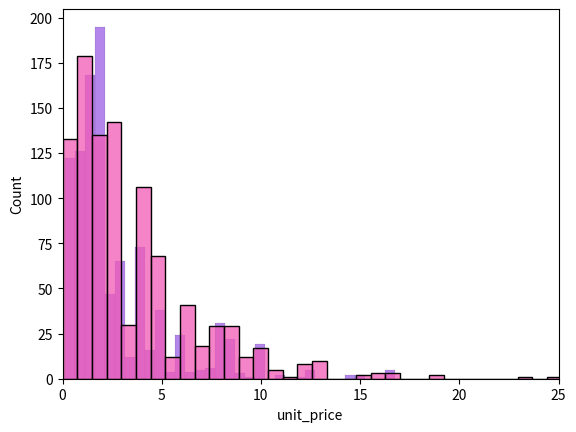

In [498]:
sns.histplot(stock_raw.loc[stock_raw.index < 1000,'unit_price'])
plt.xlim(0,25)
sns.histplot(stock_raw.loc[stock_raw.index > 2714,'unit_price'])
plt.xlim(0,25)

In [ ]:
execfile("ctoi.py")
css = categorization(new)
kmeans.fit_transform(new)
kmeans.fit(css)
kmeans.labels_
labels = pd.Series({'labels':kmeans.labels_})
new['labels'] =kmeans.labels_
new